#### Обработка данных

In [1]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt 
import scipy
import scipy.odr as odr

from statsmodels.stats.weightstats import *

%pylab inline

/Users/heyfaraday/anaconda/envs/new2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning:

Matplotlib is building the font cache using fc-list. This may take a moment.



Populating the interactive namespace from numpy and matplotlib


In [35]:
data = pd.read_csv('data/experiment.csv') # Считываем данные

In [36]:
data.head # Посмотрим на несколько значений

<bound method DataFrame.head of    m   r1   r2   r3   r4
0  1  2.7  3.5  2.7  3.5
1  2  3.9  4.4  3.8  4.4
2  3  4.8  5.2  4.7  5.1
3  4  5.5  5.8  5.4  5.8
4  5  6.1  6.4  6.0  6.3
5  6  6.7  7.0  6.6  6.9
6  7  7.2  7.5  7.2  7.4
7  8  7.7  8.0  7.7  7.9>

In [40]:
first = (data["r1"] + data["r2"])/2.0
second = (data["r3"] + data["r4"])/2.0

In [41]:
matoj = (first + second)/2

In [49]:
disp1 = (first - matoj)**2 + (second - matoj)**2

In [50]:
disp = np.sqrt(disp1)

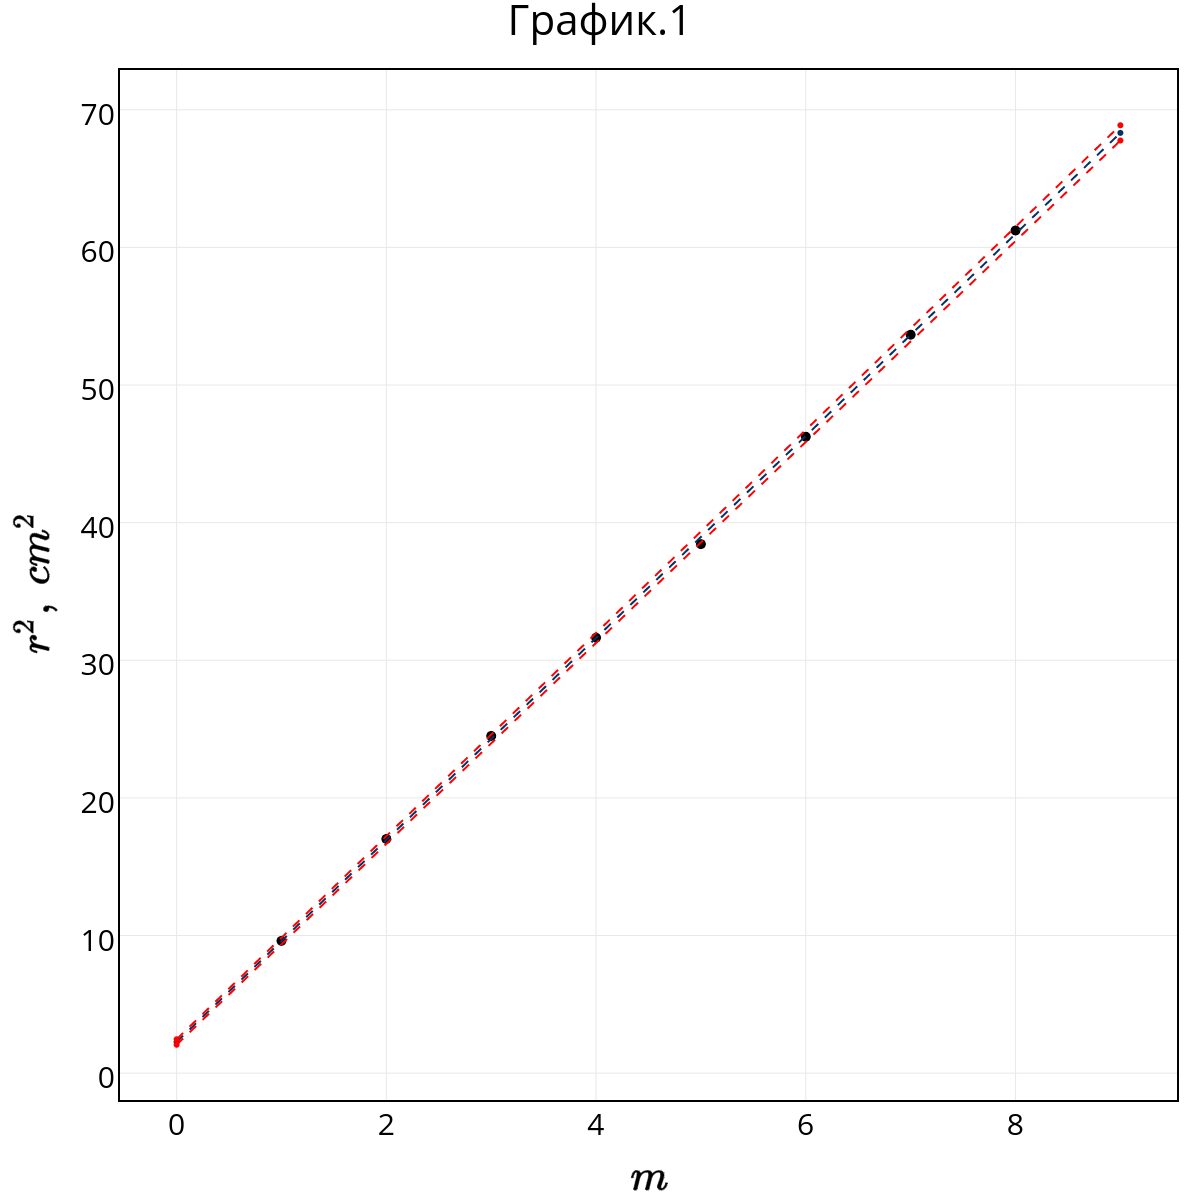

In [64]:
trace1 = go.Scatter(
    x = data["m"],
    y = matoj**2,
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'constant',
        value = 0.1,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace2 = go.Scatter(
    x = [0, 9],
    y = [2.26207589, 2.26207589 + 7.33995536*9],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace3 = go.Scatter(
    x = [0, 9],
    y = [2.26207589 + 0.19936287, 2.26207589 + 0.19936287 + (7.33995536 + 0.03947973)*9],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace4 = go.Scatter(
    x = [0, 9],
    y = [2.26207589 - 0.19936287, 2.26207589 - 0.19936287 + (7.33995536 - 0.03947973)*9],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)


trace0 = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    legend=dict(
        #x=0.9,
        #y=1
        orientation= "h"
    ),
    title = "График.1",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$m$',
        #range = [0.0, 1.5],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$r^2,~cm^2$',
        #range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

In [59]:
Y = np.reshape(np.array(matoj**2), (1, len(np.array(matoj**2))))
X = np.reshape(np.array(data["m"]), (1, len(np.array(data["m"]))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[ 7.33995536  2.26207589]
[ 0.03947973  0.19936287]
